In [1]:
import pandas as pd
import numpy as np
import keras
from datetime import datetime
from keras.models import Sequential 
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from keras import losses
from keras.constraints import maxnorm
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import seaborn as sns
sns.set()
from collections import Counter
from scipy.stats import uniform
from scipy.stats import randint
import shap
from sklearn.metrics import mean_squared_error, make_scorer, accuracy_score, f1_score, classification_report
import pickle
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from commons import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score
from keras.models import load_model
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Audio
#sound_file = 'beep.wav'
from keras.callbacks import *

Using TensorFlow backend.
/Users/liuxuyang/opt/anaconda3/envs/mytensorflow/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Etherium

In [2]:
regs = pd.read_csv("train_eth_selected_features.csv")
btc = pd.read_csv("etherium_Data.csv")
for i in range(len(btc['Date'])):
    btc['Date'][i]  =  datetime.strptime(btc['Date'][i], '%Y/%m/%d')

btc = btc.set_index("Date")


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [3]:
btcData = btc[regs.columns]

In [4]:
btcData['returns'] = btcData['priceUSD'].pct_change()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [5]:
Data = btcData.drop(columns=['priceUSD'])
Data = Data[1:]

In [6]:
Data 

,activeaddresses90roc,confirmationtime,confirmationtime90roc,difficulty90roc,fee_to_reward90rocUSD,fee_to_rewardUSD,hashrate90roc,median_transaction_fee90rocUSD,mediantransactionvalue90rocUSD,mediantransactionvalueUSD,...,sentinusd90rocUSD,sentinusdUSD,size,size90roc,transactionfees90rocUSD,transactionfeesUSD,transactions90roc,transactionvalue90rocUSD,transactionvalueUSD,returns
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-02,68.156,0.283,-4.102,31.289,92.095,0.0684,42.295,43.084,64.299,1.348,...,33.650,250428,953.560,22.907,112.289,0.00204,38.345,-3.394,27.327,0.006250
2016-01-03,67.716,0.280,-2.435,32.266,60.229,0.0679,41.299,48.484,6.051,1.320,...,235.901,363640,955.046,23.805,70.505,0.00206,47.444,127.816,39.278,0.015528
2016-01-04,71.308,0.283,-5.691,32.784,94.471,0.0751,46.895,56.364,32.177,1.238,...,-52.432,149848,981.314,25.645,127.247,0.00219,46.702,-67.575,15.817,-0.009174
2016-01-05,71.818,0.281,-2.380,38.812,358.045,0.2060,49.564,359.484,-100.000,0.000,...,415.046,1010627,1396.000,72.720,231.035,0.00358,130.726,123.229,61.511,0.003086
2016-01-06,87.024,0.283,1.218,40.900,434.941,0.2310,47.170,360.138,-100.000,0.000,...,35.258,255146,1553.000,96.838,264.918,0.00380,146.520,-45.133,14.944,-0.001026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-25,-1.334,0.201,-12.856,-100.000,-15.546,2.1180,-100.000,6.214,0.000,0.000,...,-23.152,1634051131,68250.000,-21.055,11.363,1.70400,-4.659,-19.397,1635.000,-0.007506
2022-11-26,-6.811,0.201,-12.851,-100.000,-18.774,2.0300,-100.000,9.807,-100.000,0.000,...,-46.738,1167917265,71240.000,-20.897,15.063,1.78600,-8.786,-41.608,1249.000,0.021008
2022-11-27,-13.483,0.201,-11.622,-100.000,-38.242,1.9200,-100.000,-38.760,0.000,0.000,...,-68.602,1061082115,68460.000,-27.495,-28.381,1.82900,-18.636,-61.410,1204.000,0.000000


In [7]:
# divide X and Y
X = Data.iloc[:,0:]
#Y = Data['returns']   # 用returns的话就用这一行，然后把下一行comment掉
Y = btcData['priceUSD'].shift(-30)[1:] # 反之亦然

In [8]:
X.head(3)

,activeaddresses90roc,confirmationtime,confirmationtime90roc,difficulty90roc,fee_to_reward90rocUSD,fee_to_rewardUSD,hashrate90roc,median_transaction_fee90rocUSD,mediantransactionvalue90rocUSD,mediantransactionvalueUSD,...,sentinusd90rocUSD,sentinusdUSD,size,size90roc,transactionfees90rocUSD,transactionfeesUSD,transactions90roc,transactionvalue90rocUSD,transactionvalueUSD,returns
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-02,68.156,0.283,-4.102,31.289,92.095,0.0684,42.295,43.084,64.299,1.348,...,33.650,250428,953.560,22.907,112.289,0.00204,38.345,-3.394,27.327,0.006250
2016-01-03,67.716,0.280,-2.435,32.266,60.229,0.0679,41.299,48.484,6.051,1.320,...,235.901,363640,955.046,23.805,70.505,0.00206,47.444,127.816,39.278,0.015528
2016-01-04,71.308,0.283,-5.691,32.784,94.471,0.0751,46.895,56.364,32.177,1.238,...,-52.432,149848,981.314,25.645,127.247,0.00219,46.702,-67.575,15.817,-0.009174


In [10]:
# Split into three data sets
X_train = X['2016-01-01':'2019-12-31']
X_val = X['2020-01-01':'2021-05-31']
X_test = X['2021-06-01':'2023-01-01']

Y_train = Y['2016-01-01':'2019-12-31']
Y_val = Y['2020-01-01':'2021-05-31']
Y_test = Y['2021-06-01':'2023-01-01']

In [11]:
estimators=[]
estimators.append(['mixmax',MinMaxScaler()])
estimators.append(['robust',RobustScaler()])
scale=Pipeline(estimators,verbose=True)
scale.fit(X_train)

[Pipeline] ............ (step 1 of 2) Processing mixmax, total=   0.0s
[Pipeline] ............ (step 2 of 2) Processing robust, total=   0.0s


Pipeline(steps=[('mixmax', MinMaxScaler()), ['robust', RobustScaler()]],
         verbose=True)

In [12]:
X_train=scale.transform(X_train)
X_test=scale.transform(X_test)
X_val = scale.transform(X_val)

In [13]:
def lr_schedule(epoch):
    """Learning Rate Schedule
    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.
    # Arguments
        epoch (int): The number of epochs
    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

In [14]:
from keras import regularizers
# define neural network model
shape=X.shape[1]
def sequential_model(initializer='normal', activation='relu', neurons=200, NUM_FEATURES=shape):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_shape=(NUM_FEATURES,), kernel_initializer=initializer, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1, activation=activation))
    # Compile model
    adam=keras.optimizers.adam(lr=lr_schedule(0), amsgrad=True)
    #sgd=keras.optimizers.SGD(learning_rate=0.08, momentum=0.9, nesterov=False)
    model.compile(loss='logcosh', optimizer=adam, metrics=['mae'])
    return model

In [15]:
#mcp_save = ModelCheckpoint('trained_models/ANN_reg_seven_new.hdf5', save_best_only=True, monitor='val_loss', mode='auto')
#earlyStopping = EarlyStopping(monitor='val_loss', patience=100,verbose=1, mode='auto')

In [16]:
regressor=KerasRegressor(build_fn=sequential_model,epochs=1000,verbose=1, shuffle=True,use_multiprocessing=True)

In [17]:
regressor.fit(X_train,Y_train,validation_data=(X_val, Y_val))
#Audio(sound_file,autoplay=True)

2022-11-30 20:32:29.348150: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-30 20:32:29.350466: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Learning rate:  0.001
Train on 1460 samples, validate on 517 samples
Epoch 1/1000
1460/1460 [==============================] - 1s 680us/step - loss: 196.0952 - mae: 196.7837 - val_loss: 391.8425 - val_mae: 392.5353
Epoch 2/1000
1460/1460 [==============================] - 0s 217us/step - loss: 98.9023 - mae: 99.5834 - val_loss: 962.4407 - val_mae: 963.1322
Epoch 3/1000
1460/1460 [==============================] - 0s 216us/step - loss: 76.2706 - mae: 76.9508 - val_loss: 1489.8495 - val_mae: 1490.5420
Epoch 4/1000
1460/1460 [==============================] - 0s 214us/step - loss: 66.8127 - mae: 67.4886 - val_loss: 1540.8121 - val_mae: 1541.5035
Epoch 5/1000
1460/1460 [==============================] - 0s 223us/step - loss: 62.5915 - mae: 63.2647 - val_loss: 1520.3272 - val_mae: 1521.0190
Epoch 6/1000
1460/1460 [==============================] - 0s 232us/step - loss: 61.2234 - mae: 61.8951 - val_loss: 1650.6043 - val_mae: 1651.2966
Epoch 7/1000
1460/1460 [==============================] -

Epoch 57/1000
1460/1460 [==============================] - 0s 202us/step - loss: 20.0258 - mae: 20.6497 - val_loss: 468.4362 - val_mae: 469.1283
Epoch 58/1000
1460/1460 [==============================] - 0s 215us/step - loss: 19.8272 - mae: 20.4513 - val_loss: 415.0322 - val_mae: 415.7242
Epoch 59/1000
1460/1460 [==============================] - 0s 246us/step - loss: 18.9912 - mae: 19.6120 - val_loss: 466.4093 - val_mae: 467.1024
Epoch 60/1000
1460/1460 [==============================] - 0s 228us/step - loss: 18.9809 - mae: 19.6064 - val_loss: 440.2298 - val_mae: 440.9229
Epoch 61/1000
1460/1460 [==============================] - 0s 223us/step - loss: 20.4211 - mae: 21.0499 - val_loss: 433.0326 - val_mae: 433.7257
Epoch 62/1000
1460/1460 [==============================] - 0s 208us/step - loss: 18.6573 - mae: 19.2791 - val_loss: 415.1548 - val_mae: 415.8452
Epoch 63/1000
1460/1460 [==============================] - 0s 217us/step - loss: 19.0400 - mae: 19.6582 - val_loss: 430.3283 - val

1460/1460 [==============================] - 0s 226us/step - loss: 15.2899 - mae: 15.9045 - val_loss: 375.7082 - val_mae: 376.4002
Epoch 114/1000
1460/1460 [==============================] - 0s 220us/step - loss: 19.6112 - mae: 20.2313 - val_loss: 422.4143 - val_mae: 423.1074
Epoch 115/1000
1460/1460 [==============================] - 0s 230us/step - loss: 15.3414 - mae: 15.9536 - val_loss: 441.4498 - val_mae: 442.1414
Epoch 116/1000
1460/1460 [==============================] - 0s 223us/step - loss: 15.5374 - mae: 16.1484 - val_loss: 395.5746 - val_mae: 396.2648
Epoch 117/1000
1460/1460 [==============================] - 0s 202us/step - loss: 15.8325 - mae: 16.4458 - val_loss: 432.5842 - val_mae: 433.2773
Epoch 118/1000
1460/1460 [==============================] - 0s 201us/step - loss: 14.2682 - mae: 14.8703 - val_loss: 432.4113 - val_mae: 433.1029
Epoch 119/1000
1460/1460 [==============================] - 0s 201us/step - loss: 14.5492 - mae: 15.1564 - val_loss: 463.8126 - val_mae: 46

1460/1460 [==============================] - 0s 228us/step - loss: 13.0521 - mae: 13.6516 - val_loss: 437.8159 - val_mae: 438.5052
Epoch 170/1000
1460/1460 [==============================] - 0s 256us/step - loss: 12.2750 - mae: 12.8771 - val_loss: 407.0189 - val_mae: 407.7119
Epoch 171/1000
1460/1460 [==============================] - 0s 234us/step - loss: 11.8914 - mae: 12.4861 - val_loss: 450.9821 - val_mae: 451.6750
Epoch 172/1000
1460/1460 [==============================] - 0s 259us/step - loss: 11.7512 - mae: 12.3452 - val_loss: 467.1685 - val_mae: 467.8611
Epoch 173/1000
1460/1460 [==============================] - 0s 230us/step - loss: 12.2783 - mae: 12.8801 - val_loss: 454.2108 - val_mae: 454.9036
Epoch 174/1000
1460/1460 [==============================] - 0s 233us/step - loss: 13.9286 - mae: 14.5373 - val_loss: 429.5999 - val_mae: 430.2927
Epoch 175/1000
1460/1460 [==============================] - 0s 226us/step - loss: 11.5844 - mae: 12.1831 - val_loss: 466.4275 - val_mae: 46

1460/1460 [==============================] - 0s 251us/step - loss: 10.0784 - mae: 10.6696 - val_loss: 466.5003 - val_mae: 467.1933
Epoch 226/1000
1460/1460 [==============================] - 0s 210us/step - loss: 9.9146 - mae: 10.5040 - val_loss: 442.4989 - val_mae: 443.1919
Epoch 227/1000
1460/1460 [==============================] - 0s 214us/step - loss: 9.6549 - mae: 10.2404 - val_loss: 457.2556 - val_mae: 457.9480
Epoch 228/1000
1460/1460 [==============================] - 0s 229us/step - loss: 9.5905 - mae: 10.1715 - val_loss: 465.0633 - val_mae: 465.7557
Epoch 229/1000
1460/1460 [==============================] - 0s 246us/step - loss: 10.7152 - mae: 11.3037 - val_loss: 448.9283 - val_mae: 449.6210
Epoch 230/1000
1460/1460 [==============================] - 0s 247us/step - loss: 10.6087 - mae: 11.2024 - val_loss: 458.5509 - val_mae: 459.2439
Epoch 231/1000
1460/1460 [==============================] - 1s 409us/step - loss: 9.8133 - mae: 10.4048 - val_loss: 459.4992 - val_mae: 460.18

1460/1460 [==============================] - 0s 209us/step - loss: 8.6984 - mae: 9.2810 - val_loss: 490.0085 - val_mae: 490.7015
Epoch 282/1000
1460/1460 [==============================] - 0s 205us/step - loss: 9.0864 - mae: 9.6613 - val_loss: 491.6849 - val_mae: 492.3770
Epoch 283/1000
1460/1460 [==============================] - 0s 214us/step - loss: 9.2779 - mae: 9.8635 - val_loss: 501.4242 - val_mae: 502.1167
Epoch 284/1000
1460/1460 [==============================] - 0s 209us/step - loss: 8.3711 - mae: 8.9543 - val_loss: 467.1377 - val_mae: 467.8297
Epoch 285/1000
1460/1460 [==============================] - 0s 208us/step - loss: 8.2055 - mae: 8.7853 - val_loss: 485.8226 - val_mae: 486.5157
Epoch 286/1000
1460/1460 [==============================] - 0s 204us/step - loss: 8.2510 - mae: 8.8321 - val_loss: 485.6477 - val_mae: 486.3376
Epoch 287/1000
1460/1460 [==============================] - 0s 208us/step - loss: 9.2387 - mae: 9.8199 - val_loss: 505.9497 - val_mae: 506.6413
Epoch 2

Epoch 338/1000
1460/1460 [==============================] - 0s 208us/step - loss: 8.1257 - mae: 8.6901 - val_loss: 440.1553 - val_mae: 440.8454
Epoch 339/1000
1460/1460 [==============================] - 0s 209us/step - loss: 8.7976 - mae: 9.3770 - val_loss: 479.7632 - val_mae: 480.4549
Epoch 340/1000
1460/1460 [==============================] - 0s 212us/step - loss: 7.4802 - mae: 8.0443 - val_loss: 493.4466 - val_mae: 494.1384
Epoch 341/1000
1460/1460 [==============================] - 0s 207us/step - loss: 8.2579 - mae: 8.8270 - val_loss: 494.8182 - val_mae: 495.5106
Epoch 342/1000
1460/1460 [==============================] - 0s 210us/step - loss: 7.5516 - mae: 8.1293 - val_loss: 472.3830 - val_mae: 473.0740
Epoch 343/1000
1460/1460 [==============================] - 0s 209us/step - loss: 7.8420 - mae: 8.4038 - val_loss: 490.0684 - val_mae: 490.7589
Epoch 344/1000
1460/1460 [==============================] - 0s 216us/step - loss: 7.9026 - mae: 8.4829 - val_loss: 487.4447 - val_mae: 4

Epoch 395/1000
1460/1460 [==============================] - 0s 208us/step - loss: 9.3189 - mae: 9.8889 - val_loss: 478.0183 - val_mae: 478.7106
Epoch 396/1000
1460/1460 [==============================] - 0s 208us/step - loss: 7.2679 - mae: 7.8383 - val_loss: 487.5990 - val_mae: 488.2894
Epoch 397/1000
1460/1460 [==============================] - 0s 210us/step - loss: 7.5922 - mae: 8.1607 - val_loss: 524.2016 - val_mae: 524.8925
Epoch 398/1000
1460/1460 [==============================] - 0s 210us/step - loss: 6.6764 - mae: 7.2337 - val_loss: 464.9392 - val_mae: 465.6320
Epoch 399/1000
1460/1460 [==============================] - 0s 222us/step - loss: 7.6574 - mae: 8.2197 - val_loss: 494.9149 - val_mae: 495.6080
Epoch 400/1000
1460/1460 [==============================] - 0s 213us/step - loss: 6.9862 - mae: 7.5496 - val_loss: 497.6950 - val_mae: 498.3880
Epoch 401/1000
1460/1460 [==============================] - 0s 232us/step - loss: 7.0653 - mae: 7.6269 - val_loss: 501.5322 - val_mae: 5

Epoch 452/1000
1460/1460 [==============================] - 1s 532us/step - loss: 6.9790 - mae: 7.5310 - val_loss: 466.9601 - val_mae: 467.6531
Epoch 453/1000
1460/1460 [==============================] - 1s 516us/step - loss: 7.0226 - mae: 7.5815 - val_loss: 506.6861 - val_mae: 507.3788
Epoch 454/1000
1460/1460 [==============================] - 0s 293us/step - loss: 6.1114 - mae: 6.6629 - val_loss: 461.3295 - val_mae: 462.0207
Epoch 455/1000
1460/1460 [==============================] - 0s 211us/step - loss: 6.7920 - mae: 7.3504 - val_loss: 488.1771 - val_mae: 488.8698
Epoch 456/1000
1460/1460 [==============================] - 0s 209us/step - loss: 7.3604 - mae: 7.9395 - val_loss: 492.6311 - val_mae: 493.3242
Epoch 457/1000
1460/1460 [==============================] - 0s 220us/step - loss: 6.3145 - mae: 6.8725 - val_loss: 480.4117 - val_mae: 481.1039
Epoch 458/1000
1460/1460 [==============================] - 0s 209us/step - loss: 5.9582 - mae: 6.5128 - val_loss: 498.1596 - val_mae: 4

Epoch 509/1000
1460/1460 [==============================] - 0s 208us/step - loss: 6.5238 - mae: 7.0713 - val_loss: 467.1250 - val_mae: 467.8181
Epoch 510/1000
1460/1460 [==============================] - 0s 206us/step - loss: 6.0616 - mae: 6.6112 - val_loss: 491.4178 - val_mae: 492.1106
Epoch 511/1000
1460/1460 [==============================] - 0s 208us/step - loss: 5.5760 - mae: 6.1311 - val_loss: 474.4117 - val_mae: 475.1042
Epoch 512/1000
1460/1460 [==============================] - 0s 208us/step - loss: 5.7765 - mae: 6.3135 - val_loss: 489.2035 - val_mae: 489.8965
Epoch 513/1000
1460/1460 [==============================] - 0s 212us/step - loss: 5.5924 - mae: 6.1336 - val_loss: 456.6579 - val_mae: 457.3495
Epoch 514/1000
1460/1460 [==============================] - 0s 208us/step - loss: 6.5406 - mae: 7.0870 - val_loss: 482.5931 - val_mae: 483.2846
Epoch 515/1000
1460/1460 [==============================] - 0s 208us/step - loss: 5.7646 - mae: 6.3035 - val_loss: 457.3773 - val_mae: 4

Epoch 566/1000
1460/1460 [==============================] - 1s 565us/step - loss: 6.3882 - mae: 6.9303 - val_loss: 445.0708 - val_mae: 445.7635
Epoch 567/1000
1460/1460 [==============================] - 1s 551us/step - loss: 5.8145 - mae: 6.3591 - val_loss: 444.3721 - val_mae: 445.0646
Epoch 568/1000
1460/1460 [==============================] - 1s 591us/step - loss: 6.3015 - mae: 6.8478 - val_loss: 439.8025 - val_mae: 440.4946
Epoch 569/1000
1460/1460 [==============================] - 1s 527us/step - loss: 5.8012 - mae: 6.3537 - val_loss: 460.5838 - val_mae: 461.2763
Epoch 570/1000
1460/1460 [==============================] - 1s 586us/step - loss: 5.2697 - mae: 5.8117 - val_loss: 436.4060 - val_mae: 437.0989
Epoch 571/1000
1460/1460 [==============================] - 1s 541us/step - loss: 5.0991 - mae: 5.6304 - val_loss: 511.3584 - val_mae: 512.0502
Epoch 572/1000
1460/1460 [==============================] - 0s 285us/step - loss: 5.7675 - mae: 6.3143 - val_loss: 472.8119 - val_mae: 4

Epoch 623/1000
1460/1460 [==============================] - 0s 250us/step - loss: 5.2132 - mae: 5.7510 - val_loss: 418.3378 - val_mae: 419.0289
Epoch 624/1000
1460/1460 [==============================] - 0s 220us/step - loss: 4.6849 - mae: 5.2227 - val_loss: 422.6637 - val_mae: 423.3549
Epoch 625/1000
1460/1460 [==============================] - 0s 209us/step - loss: 4.7576 - mae: 5.2798 - val_loss: 381.0437 - val_mae: 381.7354
Epoch 626/1000
1460/1460 [==============================] - 0s 216us/step - loss: 5.1967 - mae: 5.7354 - val_loss: 416.7449 - val_mae: 417.4352
Epoch 627/1000
1460/1460 [==============================] - 0s 222us/step - loss: 5.8314 - mae: 6.3671 - val_loss: 454.9836 - val_mae: 455.6758
Epoch 628/1000
1460/1460 [==============================] - 0s 215us/step - loss: 5.3680 - mae: 5.8941 - val_loss: 438.8675 - val_mae: 439.5602
Epoch 629/1000
1460/1460 [==============================] - 0s 212us/step - loss: 5.9032 - mae: 6.4364 - val_loss: 443.4309 - val_mae: 4

Epoch 680/1000
1460/1460 [==============================] - 0s 206us/step - loss: 5.3817 - mae: 5.9257 - val_loss: 402.3680 - val_mae: 403.0580
Epoch 681/1000
1460/1460 [==============================] - 0s 207us/step - loss: 4.6249 - mae: 5.1555 - val_loss: 428.0396 - val_mae: 428.7323
Epoch 682/1000
1460/1460 [==============================] - 0s 207us/step - loss: 4.5476 - mae: 5.0722 - val_loss: 407.1291 - val_mae: 407.8221
Epoch 683/1000
1460/1460 [==============================] - 0s 210us/step - loss: 4.1637 - mae: 4.6765 - val_loss: 422.3574 - val_mae: 423.0496
Epoch 684/1000
1460/1460 [==============================] - 0s 204us/step - loss: 4.8673 - mae: 5.3949 - val_loss: 408.4140 - val_mae: 409.1065
Epoch 685/1000
1460/1460 [==============================] - 0s 206us/step - loss: 4.3378 - mae: 4.8726 - val_loss: 404.5161 - val_mae: 405.2083
Epoch 686/1000
1460/1460 [==============================] - 0s 207us/step - loss: 4.4404 - mae: 4.9595 - val_loss: 405.8624 - val_mae: 4

Epoch 737/1000
1460/1460 [==============================] - 0s 215us/step - loss: 4.4137 - mae: 4.9414 - val_loss: 423.3254 - val_mae: 424.0171
Epoch 738/1000
1460/1460 [==============================] - 0s 215us/step - loss: 4.4528 - mae: 4.9749 - val_loss: 404.3671 - val_mae: 405.0597
Epoch 739/1000
1460/1460 [==============================] - 0s 232us/step - loss: 4.0852 - mae: 4.6012 - val_loss: 407.2230 - val_mae: 407.9152
Epoch 740/1000
1460/1460 [==============================] - 0s 206us/step - loss: 4.2334 - mae: 4.7491 - val_loss: 405.3998 - val_mae: 406.0916
Epoch 741/1000
1460/1460 [==============================] - 0s 213us/step - loss: 4.5360 - mae: 5.0591 - val_loss: 415.9209 - val_mae: 416.6108
Epoch 742/1000
1460/1460 [==============================] - 0s 204us/step - loss: 4.4301 - mae: 4.9514 - val_loss: 416.5191 - val_mae: 417.2095
Epoch 743/1000
1460/1460 [==============================] - 0s 215us/step - loss: 4.5299 - mae: 5.0547 - val_loss: 416.8220 - val_mae: 4

Epoch 794/1000
1460/1460 [==============================] - 0s 211us/step - loss: 4.0345 - mae: 4.5507 - val_loss: 390.8601 - val_mae: 391.5522
Epoch 795/1000
1460/1460 [==============================] - 0s 213us/step - loss: 4.6360 - mae: 5.1545 - val_loss: 406.5016 - val_mae: 407.1930
Epoch 796/1000
1460/1460 [==============================] - 0s 208us/step - loss: 4.8614 - mae: 5.3813 - val_loss: 405.6815 - val_mae: 406.3734
Epoch 797/1000
1460/1460 [==============================] - 0s 209us/step - loss: 3.6383 - mae: 4.1567 - val_loss: 426.3282 - val_mae: 427.0203
Epoch 798/1000
1460/1460 [==============================] - 0s 209us/step - loss: 3.9308 - mae: 4.4488 - val_loss: 409.9159 - val_mae: 410.6061
Epoch 799/1000
1460/1460 [==============================] - 0s 208us/step - loss: 4.1553 - mae: 4.6634 - val_loss: 402.0363 - val_mae: 402.7266
Epoch 800/1000
1460/1460 [==============================] - 0s 207us/step - loss: 4.7513 - mae: 5.2767 - val_loss: 413.7966 - val_mae: 4

Epoch 851/1000
1460/1460 [==============================] - 0s 248us/step - loss: 4.2945 - mae: 4.8241 - val_loss: 431.1164 - val_mae: 431.8080
Epoch 852/1000
1460/1460 [==============================] - 0s 223us/step - loss: 3.8146 - mae: 4.3275 - val_loss: 393.9899 - val_mae: 394.6826
Epoch 853/1000
1460/1460 [==============================] - 0s 229us/step - loss: 4.3424 - mae: 4.8606 - val_loss: 411.2043 - val_mae: 411.8960
Epoch 854/1000
1460/1460 [==============================] - 0s 230us/step - loss: 3.8943 - mae: 4.4001 - val_loss: 430.7631 - val_mae: 431.4544
Epoch 855/1000
1460/1460 [==============================] - 0s 224us/step - loss: 4.3797 - mae: 4.8959 - val_loss: 387.8272 - val_mae: 388.5190
Epoch 856/1000
1460/1460 [==============================] - 0s 228us/step - loss: 4.5729 - mae: 5.1066 - val_loss: 389.8672 - val_mae: 390.5583
Epoch 857/1000
1460/1460 [==============================] - 0s 235us/step - loss: 4.0734 - mae: 4.5977 - val_loss: 384.6874 - val_mae: 3

Epoch 908/1000
1460/1460 [==============================] - 0s 214us/step - loss: 4.3416 - mae: 4.8642 - val_loss: 385.1608 - val_mae: 385.8539
Epoch 909/1000
1460/1460 [==============================] - 0s 204us/step - loss: 3.9833 - mae: 4.4939 - val_loss: 393.9448 - val_mae: 394.6353
Epoch 910/1000
1460/1460 [==============================] - 0s 209us/step - loss: 4.0563 - mae: 4.5598 - val_loss: 379.7605 - val_mae: 380.4502
Epoch 911/1000
1460/1460 [==============================] - 0s 208us/step - loss: 4.4787 - mae: 4.9964 - val_loss: 392.8826 - val_mae: 393.5742
Epoch 912/1000
1460/1460 [==============================] - 0s 210us/step - loss: 4.0698 - mae: 4.5950 - val_loss: 376.6240 - val_mae: 377.3145
Epoch 913/1000
1460/1460 [==============================] - 0s 214us/step - loss: 4.0285 - mae: 4.5349 - val_loss: 392.2861 - val_mae: 392.9790
Epoch 914/1000
1460/1460 [==============================] - 0s 211us/step - loss: 4.3020 - mae: 4.8249 - val_loss: 379.4573 - val_mae: 3

Epoch 965/1000
1460/1460 [==============================] - 0s 207us/step - loss: 3.4232 - mae: 3.9323 - val_loss: 366.3711 - val_mae: 367.0625
Epoch 966/1000
1460/1460 [==============================] - 0s 207us/step - loss: 4.0442 - mae: 4.5582 - val_loss: 393.2681 - val_mae: 393.9611
Epoch 967/1000
1460/1460 [==============================] - 0s 207us/step - loss: 4.3994 - mae: 4.9074 - val_loss: 404.2962 - val_mae: 404.9877
Epoch 968/1000
1460/1460 [==============================] - 0s 207us/step - loss: 4.6645 - mae: 5.1809 - val_loss: 380.5887 - val_mae: 381.2814
Epoch 969/1000
1460/1460 [==============================] - 0s 208us/step - loss: 3.5405 - mae: 4.0421 - val_loss: 378.4286 - val_mae: 379.1193
Epoch 970/1000
1460/1460 [==============================] - 0s 208us/step - loss: 3.1742 - mae: 3.6817 - val_loss: 441.4188 - val_mae: 442.1109
Epoch 971/1000
1460/1460 [==============================] - 0s 211us/step - loss: 3.3078 - mae: 3.8010 - val_loss: 383.9672 - val_mae: 3

In [18]:
# for check
y_train_pred=regressor.predict(X_train)
r2_score(Y_train, y_train_pred) #training score

1460/1460 [==============================] - 0s 271us/step


0.998254724193597

In [19]:
y_pred=regressor.predict(X_test)
pre_df = pd.DataFrame(zip(Y_test,y_pred),columns=['y_test','y_pred'])
pre_df.index = Y_test.index
pre_df

547/547 [==============================] - 0s 154us/step


,y_test,y_pred
Date,,
2021-06-01,2149.0,955.913330
2021-06-02,2080.0,906.411194
2021-06-03,2192.0,951.555054
2021-06-04,2305.0,899.773438
2021-06-05,2250.0,768.609131
...,...,...
2022-11-25,NaN,472.052612
2022-11-26,NaN,473.447205
2022-11-27,NaN,500.780914


In [20]:
r2=r2_score(Y_test[0:-30],y_pred[0:-30]) #testing score/ r^2
r2

-0.6918716816481871

In [21]:
rmse=np.sqrt(mean_squared_error(Y_test[0:-30],y_pred[0:-30])) #rmse
rmse#太特么大了，感觉数据集划分有问题

1339.3482118564361

In [22]:
pre_df['pred_returns'] = pre_df['y_pred'].pct_change()

In [23]:
pre_df

,y_test,y_pred,pred_returns
Date,,,
2021-06-01,2149.0,955.913330,NaN
2021-06-02,2080.0,906.411194,-0.051785
2021-06-03,2192.0,951.555054,0.049805
2021-06-04,2305.0,899.773438,-0.054418
2021-06-05,2250.0,768.609131,-0.145775
...,...,...,...
2022-11-25,NaN,472.052612,-0.152696
2022-11-26,NaN,473.447205,0.002954
2022-11-27,NaN,500.780914,0.057733


<AxesSubplot:>

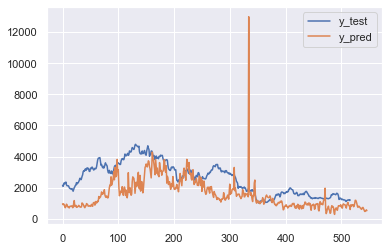

In [24]:
pd.DataFrame(zip(Y_test,y_pred),columns=['y_test','y_pred']).plot()

In [26]:
pre_df.to_csv("eth_NN.csv")